In [1]:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

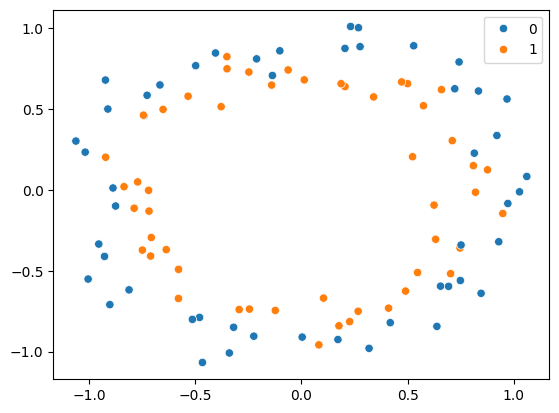

In [5]:

# Generate data
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# Scatter plot using seaborn
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

plt.show()


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [7]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\sinha\anaconda3\envs\ENV1\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

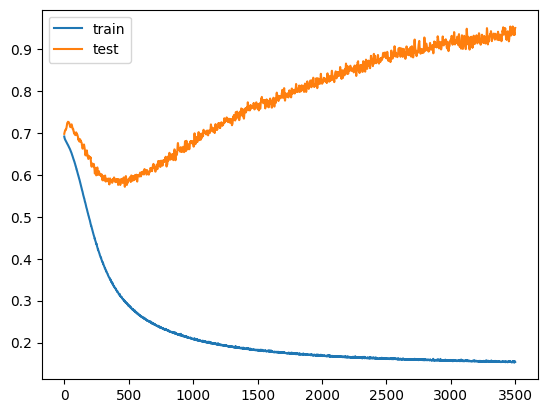

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 811us/step


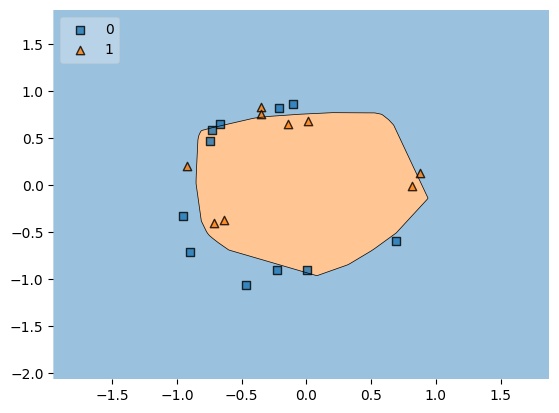

In [11]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

# Early Stopping

In [19]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
'''
. monitor:- Quantity to be monitored.

. min delta:- Minimum change in the monitored quantity to qualify as an improvement, i.e. an
absolute change of less than min_delta, will count as no improvement.

. patience:- Number of epochs with no improvement after which training will be stopped.

· verbose:- Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the
callback takes an action.

. mode:- One of ("auto", "min", "max"). In min mode, training will stop when the quantity
monitored has stopped.decreasing; in "max" mode it will stop when the quantity monitored has
stopped increasing; in "auto" mode, the direction is automatically inferred from the name of the
monitored quantity.

. baseline:- Baseline value for the monitored quantity. Training will stop if the model doesn't
show improvement over the baseline.

· restore_best_weights:- Whether to restore model weights from the epoch with the best value of
the monitored quantity. If False, the model weights obtained at the last step of training are
used. An epoch will be restored regardless of the performance relative to the baseline. If no
epoch improves on baseline, training will run for patience epochs and restore weights from the
best epoch in that set.'''

'\n. monitor:- Quantity to be monitored.\n\n. min delta:- Minimum change in the monitored quantity to qualify as an improvement, i.e. an\nabsolute change of less than min_delta, will count as no improvement.\n\n. patience:- Number of epochs with no improvement after which training will be stopped.\n\n· verbose:- Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the\ncallback takes an action.\n\n. mode:- One of ("auto", "min", "max"). In min mode, training will stop when the quantity\nmonitored has stopped.decreasing; in "max" mode it will stop when the quantity monitored has\nstopped increasing; in "auto" mode, the direction is automatically inferred from the name of the\nmonitored quantity.\n\n. baseline:- Baseline value for the monitored quantity. Training will stop if the model doesn\'t\nshow improvement over the baseline.\n\n· restore_best_weights:- Whether to restore model weights from the epoch with the best value of\nthe monitored quantity. If False, th

In [22]:

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=600,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [23]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.4375 - loss: 0.7053 - val_accuracy: 0.5500 - val_loss: 0.6897
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.4875 - loss: 0.7007 - val_accuracy: 0.5500 - val_loss: 0.6888
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4875 - loss: 0.6989 - val_accuracy: 0.5500 - val_loss: 0.6896
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6965 - val_accuracy: 0.5500 - val_loss: 0.6904
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4625 - loss: 0.6955 - val_accuracy: 0.5500 - val_loss: 0.6910
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4625 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5250 - loss: 0.6937 - val_accuracy: 0.4500 - val_loss: 0.6927
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.6926 - val_accuracy: 0.4500 - 

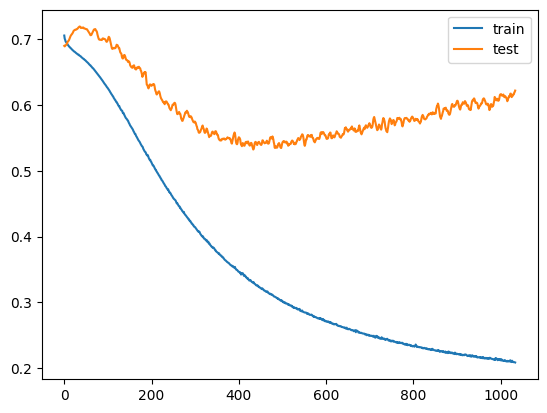

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 9s 876us/step


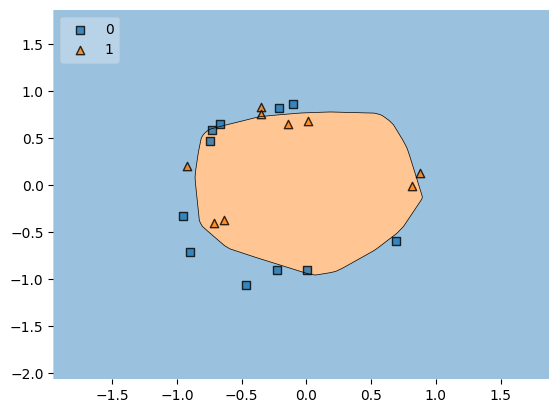

In [25]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()